# **Sequence Prediction with PyTorch**

Reference:
1. https://www.kaggle.com/code/namanmanchanda/rnn-in-pytorch

### Load Necessary Libraries & Packages

In [ ]:
# Import the necessaty packages
import numpy as np
import pandas as pd
import math
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

## **Sine Wave Prediction**

### Generate and Visualize Data

In [ ]:
# Declare the independent variable (x)
# https://pytorch.org/docs/stable/generated/torch.linspace.html

x = torch.linspace(0, 799, 800)

In [ ]:
# Print first 10 values

x[:10]

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [ ]:
# Print last 10 values

x[-10:]

tensor([790., 791., 792., 793., 794., 795., 796., 797., 798., 799.])

In [ ]:
# Creat the dependent variable, y
y = torch.sin(x * 2*math.pi/40)

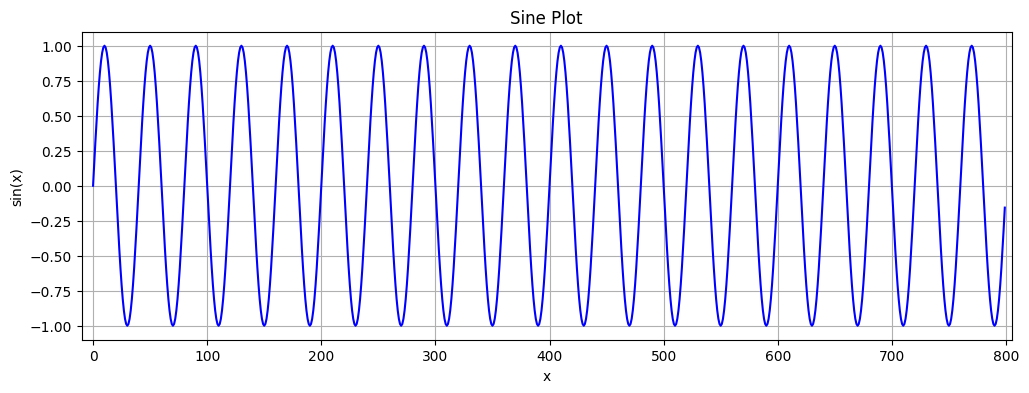

In [ ]:
# Plot y against x
plt.figure(figsize=(12, 4))
plt.xlim(-10, 805)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.title("Sine Plot")
plt.plot(y.numpy(), color='b')
plt.show()

### Data Pre-Processing

In [ ]:
# Split the data into train/test set
test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size:]

In [ ]:
# Print Length of the train set
len(train_set)

760

In [ ]:
# Print Length of the test set
len(test_set)

40

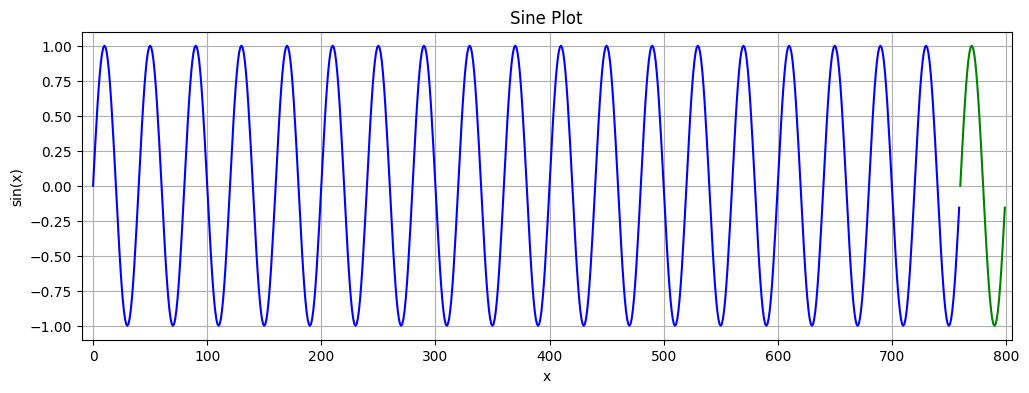

In [ ]:
# Plot the training and testing sets
plt.figure(figsize=(12, 4))
plt.xlim(-10, 805)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.title("Sine Plot")
plt.plot(train_set.numpy(), color = 'b')
plt.plot(range(760, 800), test_set.numpy(), color='g')
plt.show()

In [ ]:
# Create function to batch data
def input_data(seq, ws):
  out = []
  L = len(seq)

  for i in range(L-ws):
    window = seq[i:i+ws]
    label = seq[i+ws:i+ws+1]
    out.append((window, label))

  return out

In [ ]:
# Split data into batches
window_size = 40
train_data = input_data(train_set, window_size)

In [ ]:
# Length of the train data
len(train_data)

720

In [ ]:
# Print the first batch
train_data[0]

(tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
          7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
          1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9101e-01,  8.0902e-01,
          7.0711e-01,  5.8779e-01,  4.5399e-01,  3.0902e-01,  1.5643e-01,
         -8.7423e-08, -1.5643e-01, -3.0902e-01, -4.5399e-01, -5.8779e-01,
         -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
         -1.0000e+00, -9.8769e-01, -9.5106e-01, -8.9101e-01, -8.0902e-01,
         -7.0711e-01, -5.8779e-01, -4.5399e-01, -3.0902e-01, -1.5643e-01]),
 tensor([1.7485e-07]))

### Defining the LSTM Model

In [ ]:
# Define the LSTM class

class LSTM(nn.Module):

  # input_size: Number of expected features in the input
  # hidden_size: The number of neurons in the LSTM's hidden layer
  # out_size = The number of expected features in the output
  def __init__(self, input_size = 1, hidden_size = 50, out_size = 1):
    super().__init__()
    self.hidden_size = hidden_size
    self.lstm = nn.LSTM(input_size, hidden_size)
    self.linear = nn.Linear(hidden_size, out_size) # Creates a linear (fully connected) layer to transform the LSTM output
    # Initializes the hidden state and cell state of the LSTM:
    # Creates tensors of zeros with the following dimensions
    # First '1': Sequence length
    # Second '1': Batch size
    # hidden_size: Dimensionality of the hidden state/cell state.
    self.hidden = (torch.zeros(1, 1, hidden_size), torch.zeros(1, 1, hidden_size))

  def forward(self, seq):
    lstm_out, self.hidden = self.lstm(seq.view(len(seq),1,-1), self.hidden)
    # Reshapes the lstm_out for the linear layer (merges batch and time step dimensions).
    # Passes the reshaped output through the linear layer to get predictions.
    pred = self.linear(lstm_out.view(len(seq), -1))
    return pred[-1]

In [ ]:
torch.zeros(1, 1, 50)

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0.]]])

In [ ]:
train_data[0][0]

tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
         7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
         1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9101e-01,  8.0902e-01,
         7.0711e-01,  5.8779e-01,  4.5399e-01,  3.0902e-01,  1.5643e-01,
        -8.7423e-08, -1.5643e-01, -3.0902e-01, -4.5399e-01, -5.8779e-01,
        -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
        -1.0000e+00, -9.8769e-01, -9.5106e-01, -8.9101e-01, -8.0902e-01,
        -7.0711e-01, -5.8779e-01, -4.5399e-01, -3.0902e-01, -1.5643e-01])

In [ ]:
len(train_data[0][0])

40

In [ ]:
train_data[0][0].view(len(train_data[0][0]), 1, -1)

tensor([[[ 0.0000e+00]],

        [[ 1.5643e-01]],

        [[ 3.0902e-01]],

        [[ 4.5399e-01]],

        [[ 5.8779e-01]],

        [[ 7.0711e-01]],

        [[ 8.0902e-01]],

        [[ 8.9101e-01]],

        [[ 9.5106e-01]],

        [[ 9.8769e-01]],

        [[ 1.0000e+00]],

        [[ 9.8769e-01]],

        [[ 9.5106e-01]],

        [[ 8.9101e-01]],

        [[ 8.0902e-01]],

        [[ 7.0711e-01]],

        [[ 5.8779e-01]],

        [[ 4.5399e-01]],

        [[ 3.0902e-01]],

        [[ 1.5643e-01]],

        [[-8.7423e-08]],

        [[-1.5643e-01]],

        [[-3.0902e-01]],

        [[-4.5399e-01]],

        [[-5.8779e-01]],

        [[-7.0711e-01]],

        [[-8.0902e-01]],

        [[-8.9101e-01]],

        [[-9.5106e-01]],

        [[-9.8769e-01]],

        [[-1.0000e+00]],

        [[-9.8769e-01]],

        [[-9.5106e-01]],

        [[-8.9101e-01]],

        [[-8.0902e-01]],

        [[-7.0711e-01]],

        [[-5.8779e-01]],

        [[-4.5399e-01]],

        [[-3

In [ ]:
# Instantiate tge model
torch.manual_seed(42)
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
# Print the LSTM model
model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

### Model Training

Epoch 0 Loss: 0.09209898859262466
Performance on test range: 0.6073052287101746


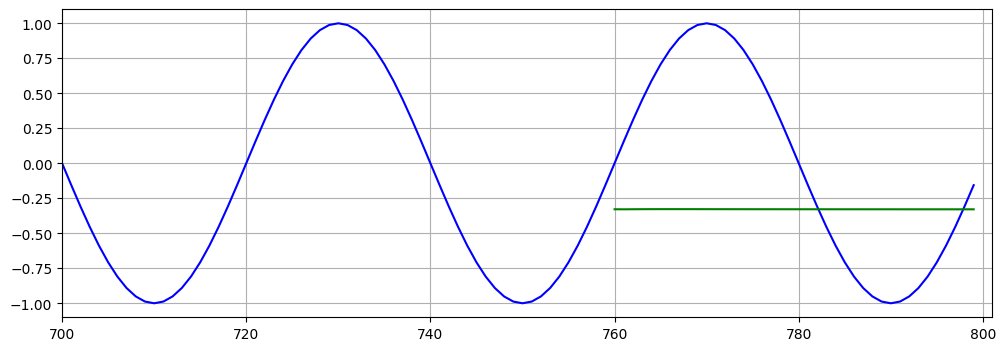

Epoch 1 Loss: 0.06505246460437775
Performance on test range: 0.5652278661727905


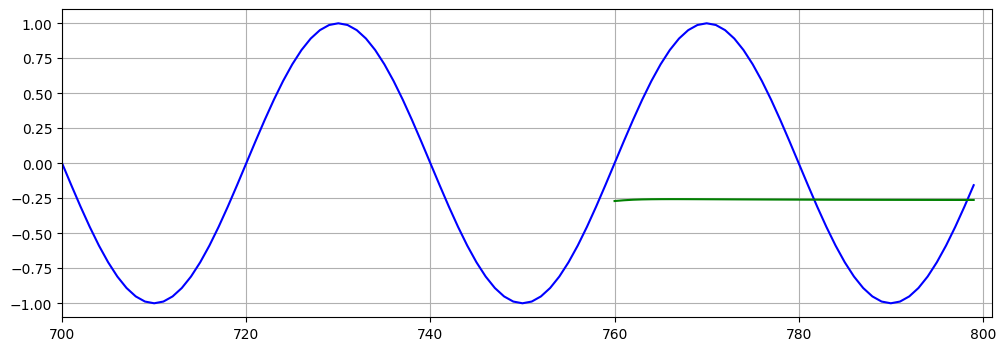

Epoch 2 Loss: 0.04197341948747635
Performance on test range: 0.5200703144073486


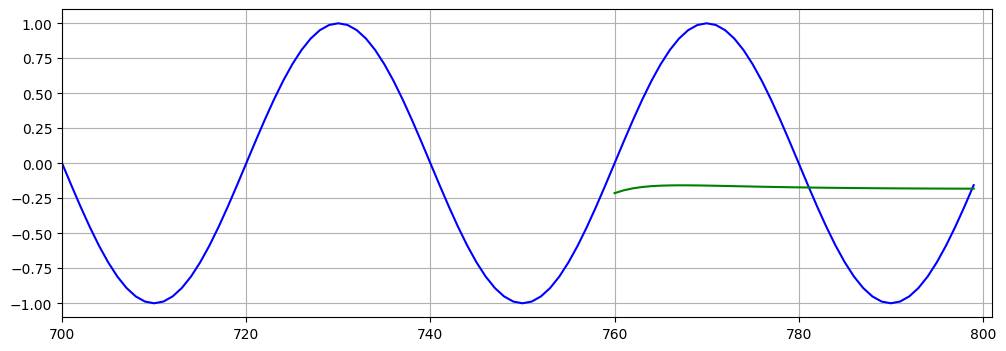

Epoch 3 Loss: 0.017842350527644157
Performance on test range: 0.422158807516098


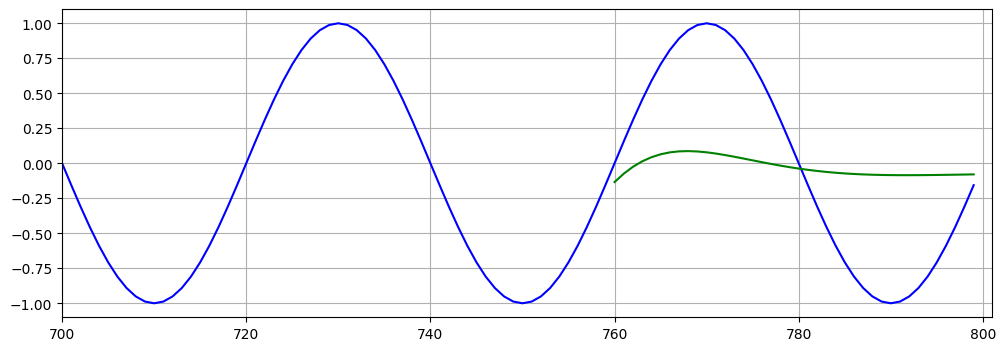

Epoch 4 Loss: 0.002889061812311411
Performance on test range: 0.16624271869659424


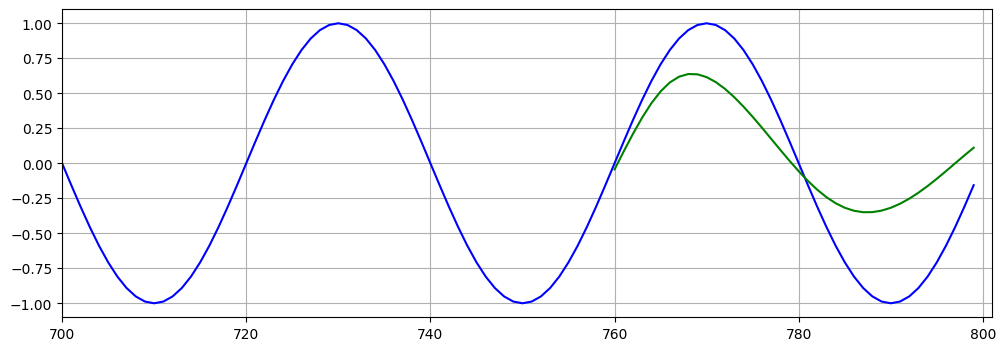

Epoch 5 Loss: 0.0003210693539585918
Performance on test range: 0.030550885945558548


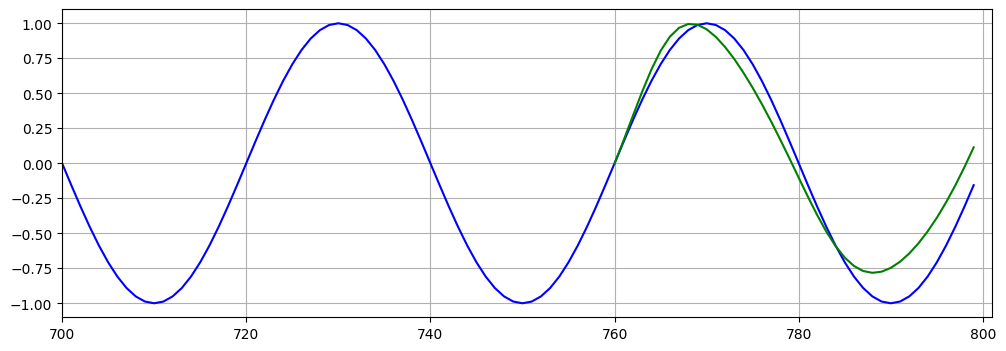

Epoch 6 Loss: 0.00013034690346103162
Performance on test range: 0.014989656396210194


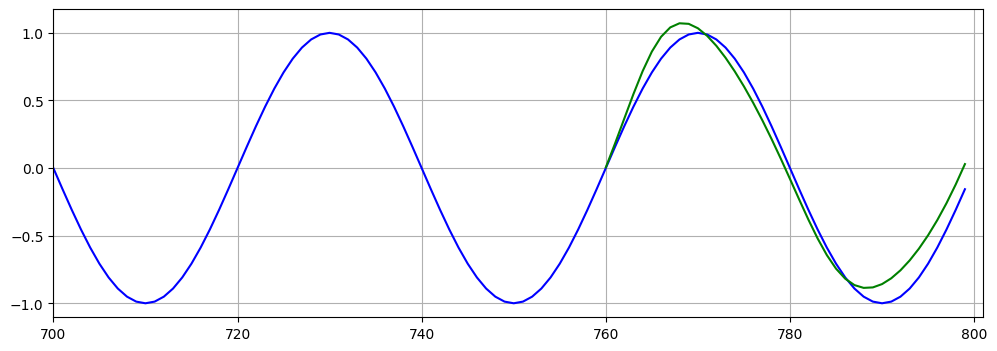

Epoch 7 Loss: 0.00012068499927408993
Performance on test range: 0.011856261640787125


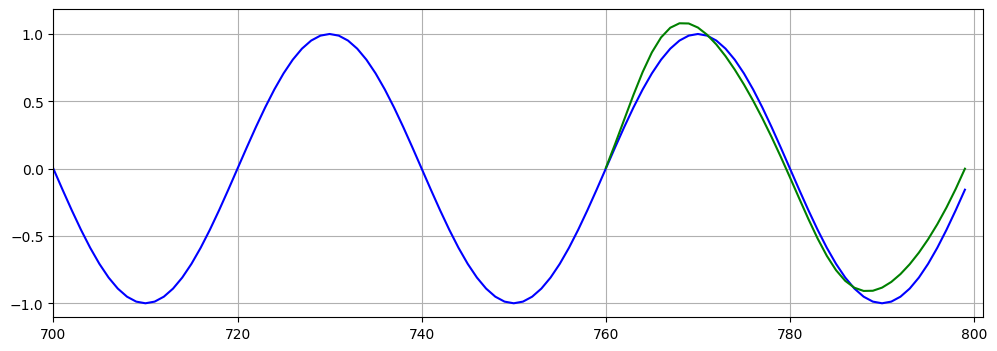

Epoch 8 Loss: 0.00012717251956928521
Performance on test range: 0.010163580998778343


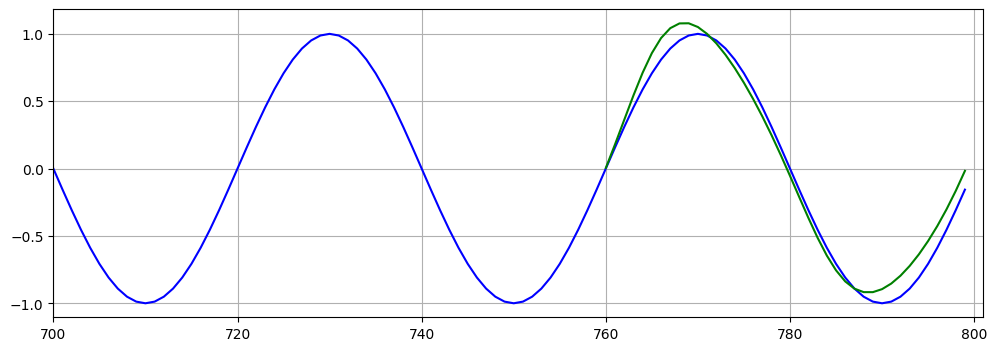

Epoch 9 Loss: 0.00013256483362056315
Performance on test range: 0.008897334337234497


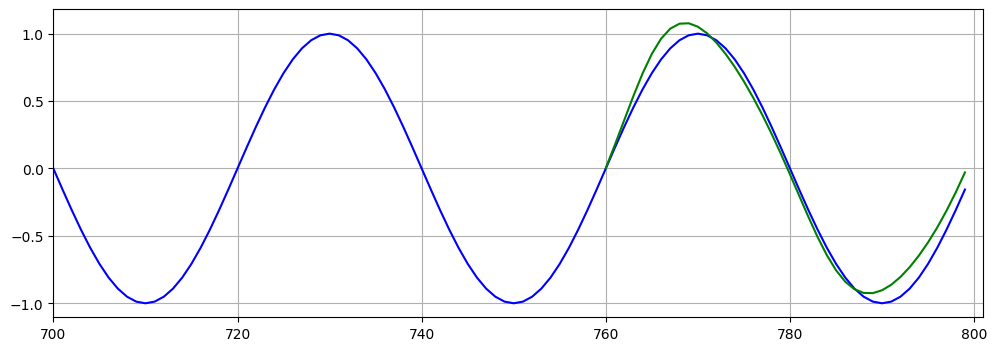

In [ ]:
# Define the training loop

epochs = 10 # Number of training epochs
future = 40 # How many time steps into the future the morel will be asked to predict

for i in range(epochs):
  for seq, y_train in train_data:
    optimizer.zero_grad() # Clears any previously calculated gradients
    # Resets the hidden and cell states of the LSTM model to zero for each new input sequence.
    # Ensure that the LSTM treats each batch as a fresh, independent sequence.
    model.hidden = (torch.zeros(1, 1, model.hidden_size), torch.zeros(1, 1, model.hidden_size))
    y_pred = model(seq)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()

  print(f"Epoch {i} Loss: {loss.item()}")

  # Takes the last window_size elements from the train_set and converts them to a list
  preds = train_set[-window_size:].tolist()

  for f in range(future):
    # Creates a PyTorch tensor for the most recent window_size predictions to feed as input to the model.
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
      model.hidden = (torch.zeros(1, 1, model.hidden_size), torch.zeros(1, 1, model.hidden_size))
      # Obtains a new prediction, converts it to a regular number, and appends it to the preds list.
      preds.append(model(seq).item())

  loss = criterion(torch.tensor(preds[-window_size:]), y[760:])
  print(f"Performance on test range: {loss}")

  plt.figure(figsize=(12, 4))
  plt.xlim(700, 801)
  plt.grid(True)
  plt.plot(y.numpy(), color='b')
  plt.plot(range(760, 800), preds[window_size:], color="g")
  plt.show()

## Prediction with Alcohol Sales Dataset

### Data Loading and Visualization

In [ ]:
# Load the CSV file as a pandas dataframe
df = pd.read_csv("/content/Alcohol_Sales.csv")

In [ ]:
# Print the datafeame
df.head()

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [ ]:
# Print information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATE            325 non-null    object
 1   S4248SM144NCEN  325 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [ ]:
# Check for null values
df.isna().sum()

DATE              0
S4248SM144NCEN    0
dtype: int64

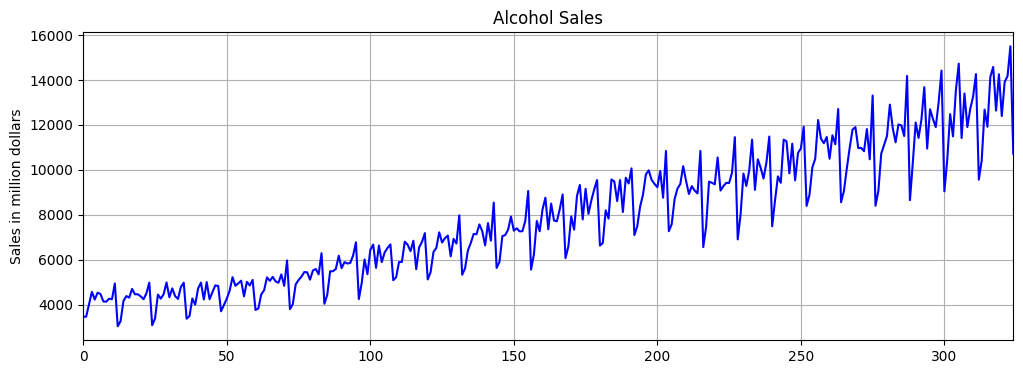

In [ ]:
# Plot the time series data
plt.figure(figsize = (12,4))
plt.title('Alcohol Sales')
plt.ylabel('Sales in million dollars')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'],color='b')
plt.show()

### Data Preprocessing

In [ ]:
# Extract the time series values convert to float
y = df['S4248SM144NCEN'].values.astype(float)
y[:5]

array([3459., 3458., 4002., 4564., 4221.])

In [ ]:
# Define train set size
test_size = 12

# Split the data
train_set = y[:-test_size]
test_set = y[-test_size:]
test_set

array([10415., 12683., 11919., 14138., 14583., 12640., 14257., 12396.,
       13914., 14174., 15504., 10718.])

In [ ]:
# Normlize the data using sklearn's MinMaxScaler (scale between -1 & 1)
from sklearn.preprocessing import MinMaxScaler

# Instantiate the scaler
scaler = MinMaxScaler(feature_range=(-1,1))

# Scale the train & test data
train_norm = scaler.fit_transform(train_set.reshape(-1,1))
test_norm = scaler.transform(test_set.reshape(-1,1))

In [ ]:
# Create batches
train_norm = torch.FloatTensor(train_norm).view(-1)

# Define the window size
window_size = 12

train_data = input_data(train_norm, window_size)
len(train_data)

301

In [ ]:
train_data[0]

(tensor([-0.9268, -0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109,
         -0.8128, -0.7901, -0.7933, -0.6743]),
 tensor([-1.]))

### Initiate a LSTM model instance

In [ ]:
model = LSTM(input_size = 1, hidden_size = 100, out_size=1)
model

LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

In [ ]:
# Criterion and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 100

import time
start_time = time.time()

for epoch in range(epochs):
  for seq, y_train in train_data:
    optimizer.zero_grad()
    model.hidden = (torch.zeros(1, 1, model.hidden_size), torch.zeros(1, 1, model.hidden_size))

    y_pred = model(seq)

    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()

  print(f'Epoch: {epoch+1:2} Loss: {loss.item():10.8f}')

print(f"\nDuration: {time.time() - start_time:.0f} seconds")

Epoch:  1 Loss: 0.25576505
Epoch:  2 Loss: 0.34052885
Epoch:  3 Loss: 0.33716282
Epoch:  4 Loss: 0.36631674
Epoch:  5 Loss: 0.30410966
Epoch:  6 Loss: 0.31500447
Epoch:  7 Loss: 0.31545278
Epoch:  8 Loss: 0.31747493
Epoch:  9 Loss: 0.30206862
Epoch: 10 Loss: 0.29655802
Epoch: 11 Loss: 0.27586147
Epoch: 12 Loss: 0.28859502
Epoch: 13 Loss: 0.26990244
Epoch: 14 Loss: 0.26792419
Epoch: 15 Loss: 0.25976962
Epoch: 16 Loss: 0.24968423
Epoch: 17 Loss: 0.26136377
Epoch: 18 Loss: 0.22368701
Epoch: 19 Loss: 0.25993136
Epoch: 20 Loss: 0.22198756
Epoch: 21 Loss: 0.21581638
Epoch: 22 Loss: 0.19807133
Epoch: 23 Loss: 0.23671374
Epoch: 24 Loss: 0.17701702
Epoch: 25 Loss: 0.19399709
Epoch: 26 Loss: 0.21625055
Epoch: 27 Loss: 0.01988933
Epoch: 28 Loss: 0.00805295
Epoch: 29 Loss: 0.01168330
Epoch: 30 Loss: 0.00076042
Epoch: 31 Loss: 0.00045019
Epoch: 32 Loss: 0.00010493
Epoch: 33 Loss: 0.00003380
Epoch: 34 Loss: 0.00000941
Epoch: 35 Loss: 0.00001590
Epoch: 36 Loss: 0.00001349
Epoch: 37 Loss: 0.00000534
E

### Model Predictions

In [ ]:
# Use the trained model for predictions

future = 12

preds = train_norm[-window_size:].tolist()

model.eval()

for i in range(future):
  seq = torch.FloatTensor(preds[-window_size:])
  with torch.no_grad():
    model.hidden = (torch.zeros(1, 1, model.hidden_size), torch.zeros(1, 1, model.hidden_size))
    preds.append(model(seq).item())

preds[window_size:]

[0.37029582262039185,
 0.5234293937683105,
 0.5409634113311768,
 0.8303514719009399,
 0.7793421745300293,
 0.5162235498428345,
 0.7852885723114014,
 0.5346331596374512,
 0.636633038520813,
 0.8386286497116089,
 0.8905268907546997,
 0.21586596965789795]

In [ ]:
# Inverse transform the predictions
true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))
true_predictions

array([[11046.54541442],
       [11942.30023885],
       [12044.86547458],
       [13737.64093488],
       [13439.26204991],
       [11900.14965481],
       [13474.04550374],
       [12007.8366673 ],
       [12604.48495883],
       [13786.05828649],
       [14089.63704747],
       [10143.20798951]])

In [ ]:
# Comparison with origial data
df['S4248SM144NCEN'][-12:]

313    10415
314    12683
315    11919
316    14138
317    14583
318    12640
319    14257
320    12396
321    13914
322    14174
323    15504
324    10718
Name: S4248SM144NCEN, dtype: int64

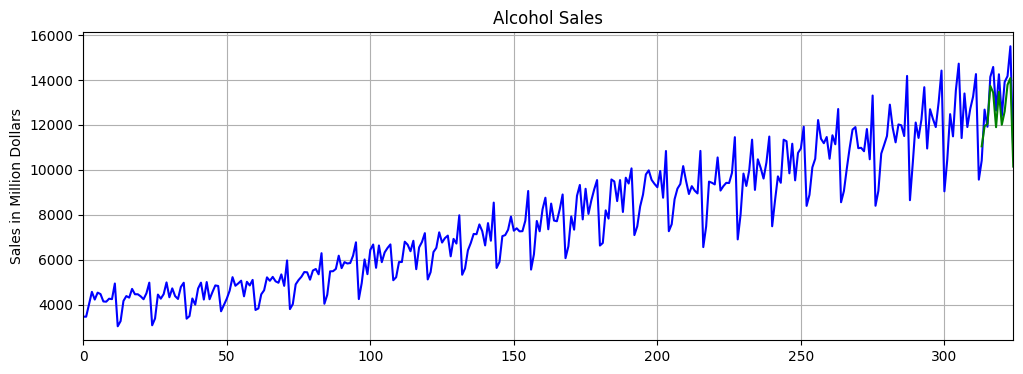

In [ ]:
# Plot the predictions on top of the training data

plt.figure(figsize=(12, 4))
plt.title('Alcohol Sales')
plt.ylabel('Sales in Million Dollars')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(df['S4248SM144NCEN'], color = 'b')
plt.plot(range(313, 325), true_predictions, color='g')
plt.show()

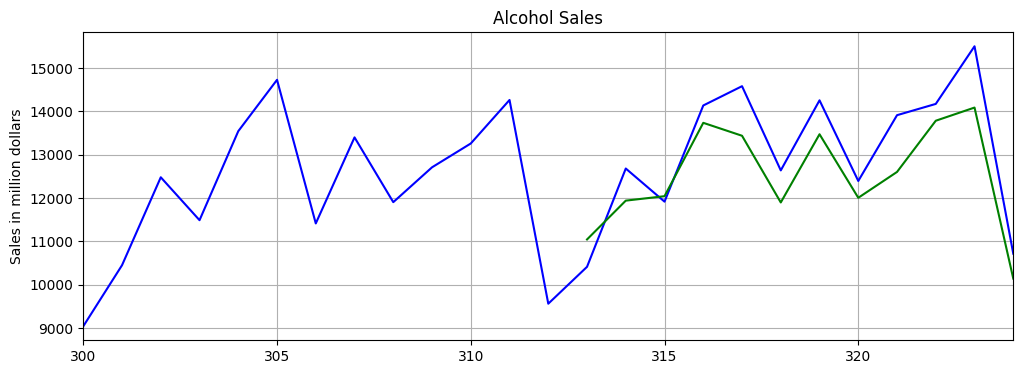

In [ ]:
# Plot the zoomed plot

fig = plt.figure(figsize=(12,4))
plt.title('Alcohol Sales')
plt.ylabel('Sales in million dollars')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

plt.plot(df['S4248SM144NCEN'][300:], color='b')
plt.plot(range(313, 325),true_predictions, color='g')
plt.show()